## Expectization Maximization - Mixture Models

In [18]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import sys

### Loading Dataset

In [19]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Lets look at initial clusters of data before we apply Gaussian mixture models or Expectixation maximixation

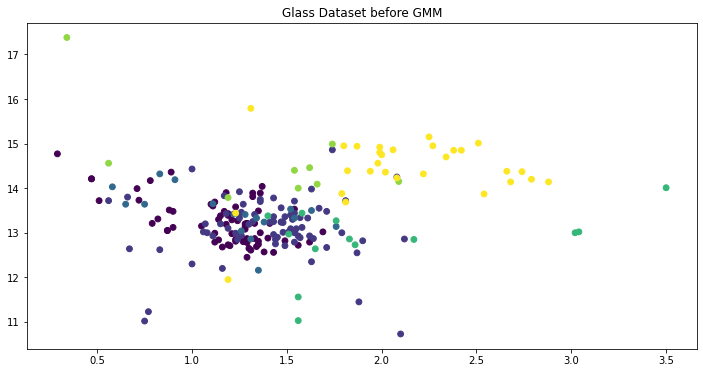

In [20]:
plt.subplots(figsize=(12,6))
plt.title("Glass Dataset before GMM");
plt.scatter(df['Al'],df['Na'],34, c=df['Type'])

Let's focus on 3 clusters. For equal probability, I will use 3 randomly selected data points from this data.

In [21]:
n1 = rand.randrange(len(df))
n2 = rand.randrange(len(df))

Let's calculate the probability using mu,sigma and other values

In [22]:
from scipy.stats import norm
def probability(data, mu, sigma, lam):
  p= lam
  for i in range(len(data)):
    p*=norm.pdf(data[i],mu[i],sigma[i][i])

  return p;

Now, let's focus on the Expectation(E part), In this step we assign the point to it's more expected cluster

In [23]:
def expectation(df, param):
    for i in range(df.shape[0]):
        x = df['Al'][i]
        y = df['Na'][i]
       
        
        
        #assigning the probablilities of each cluster
        prob_cluster1=probability([x,y],list(param['mu1']), list(param['sig1']), param['lambda'][0])
        prob_cluster2=probability([x,y],list(param['mu2']), list(param['sig2']), param['lambda'][1])

        
        # Labelling each data according to the probabilities of cluster
        if(prob_cluster1>=prob_cluster2):
            df['label'][i] =1
        else:
            df['label'][i] = 2
            
    return df

Maximization part

In [24]:

def maximization(df, param):
    dp_cluster1=df[df['label']==1]
    dp_cluster2=df[df['label']==2]
 
    percent_cluster1=len(dp_cluster1)/float(len(df))
    percent_cluster2=1-percent_cluster1
    param['lambda']=[percent_cluster1,percent_cluster2]
    
    param['mu1']=[dp_cluster1['Al'].mean(),dp_cluster1['Na'].mean()]
    param['mu2']=[dp_cluster2['Al'].mean(),dp_cluster2['Na'].mean()]
   
    param['sig1']= [[dp_cluster1['Al'].std(),0 ], [0,dp_cluster1['Na'].std()]]
    param['sig2']= [[dp_cluster1['Al'].std(),0], [0,dp_cluster2['Na'].std()]]
    
    return param

Calculating the distance to get the convergence point

In [25]:
def distance(old, new):
    dist = 0
    for param in ['mu1','mu2']:
        for i in range(len(old)):
            dist+=(old[param][i]-new[param][i])**2
    return dist**0.5

Initial input parameters - mean, variance and probability of drawing a point from thr mixture respectively

In [26]:
initial_values = { 'mu1': [df['Al'].loc[n1], df['Na'].loc[n1]], 'sig1': [ [1, 0], [0, 1]],
    'mu2': [df['Al'].loc[n2],df['Na'].loc[n2]], 'sig2': [ [1, 0], [0, 1]],'lambda': [0.4, 0.6]}

Assigning data points randomly to one of the clusters

In [27]:
df_new = df.copy()
df_new['label']=map(lambda x:x+1, np.random.choice (3,len(df)))

In [28]:
params = pd.DataFrame.from_dict(initial_values, orient = 'index')
params = params.transpose()
params

,mu1,sig1,mu2,sig2,lambda
0,1.14,"[1, 0]",1.4,"[1, 0]",0.4
1,12.84,"[0, 1]",13.38,"[0, 1]",0.6


In [29]:
shift = sys.maxsize
epsilon=0.01
itrations=0
while shift > epsilon:
    itrations += 1
    
    #Expectation-step
    new_class = expectation(df_new.copy(), params)
    
    #Maximization-step
    new_params = maximization(new_class, params.copy())
    
    #Updating the shift distance
    shift = distance(params, new_params)
    
    #updating the new labels and parameters for the next iteration
    df_copy = new_class
    params = new_params

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Lets look at the new params after the algorithm implmentation

In [30]:
params

,mu1,sig1,mu2,sig2,lambda
0,1.412,"[0.6254358480291963, 0]",1.445694,"[0.6254358480291963, 0]",0.023364
1,11.092,"[0, 0.26799253720952726]",13.463254,"[0, 0.7412716061185275]",0.976636


Lets look at the new dataframe data

In [31]:
df_new.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,label
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2,<map object at 0x7f03a73e74d0>
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,3,<map object at 0x7f03a73e74d0>
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7,<map object at 0x7f03a73e74d0>
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7,<map object at 0x7f03a73e74d0>
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2,<map object at 0x7f03a73e74d0>
23,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1,<map object at 0x7f03a73e74d0>
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6,<map object at 0x7f03a73e74d0>
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1,<map object at 0x7f03a73e74d0>
78,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2,<map object at 0x7f03a73e74d0>
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1,<map object at 0x7f03a73e74d0>


Now, let's look at the final data and clusters

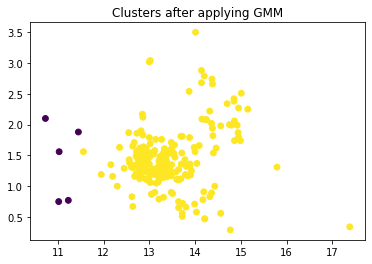

In [32]:
plt.title("Clusters after applying GMM")
plt.scatter(df_copy['Na'], df_copy['Al'], 34, c=df_copy['label'])

## Conclusion

This approach didn't really give a good classfication with 2 clusters for Glass Classification dataset. While the other K-Means approach  gave a good classification